In [1]:
# -*- coding: utf-8 -*-

R = 0.5 # Ohm
L = .00001 # H
Vin = 5.0 # V

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate

def ul(t):
    ''' Напряжение на индуктивности при заряде постоянным напряжением '''
    return Vin*np.e**((-R/L)*t)

def il(t):
    ''' Ток через индуктивность при заряде постоянным напряжением '''
    return (Vin/R)*(1-np.e**((-R/L)*t))

def Pl(t):
    ''' Мгновенная мощность через катушку индуктивности при заряде постоянным напряжением '''
    return ((Vin**2)/R)*(1-np.e**((-R/L)*t))*np.e**((-R/L)*t)

def Pl_integrate(t):
    ''' Интегральная мощность через катушку индуктивности при заряде постоянным напряжением '''
    return integrate.quad(lambda x: Pl(x), 0, t)[0]

def get_max_tt():
    for t in np.arange(0,1,1e-5):
        if ul(t) < Vin * .05:
            return t

tt=np.linspace(0, get_max_tt(), 500)

/home/vika/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/vika/.local/lib/python3.6/site-packages/matplotlib/text.py:2299: UserWarning: 'frac' option in 'arrowprops' is no longer supported; use 'headlength' to set the head length in points.
  "'frac' option in 'arrowprops' is no longer supported;"


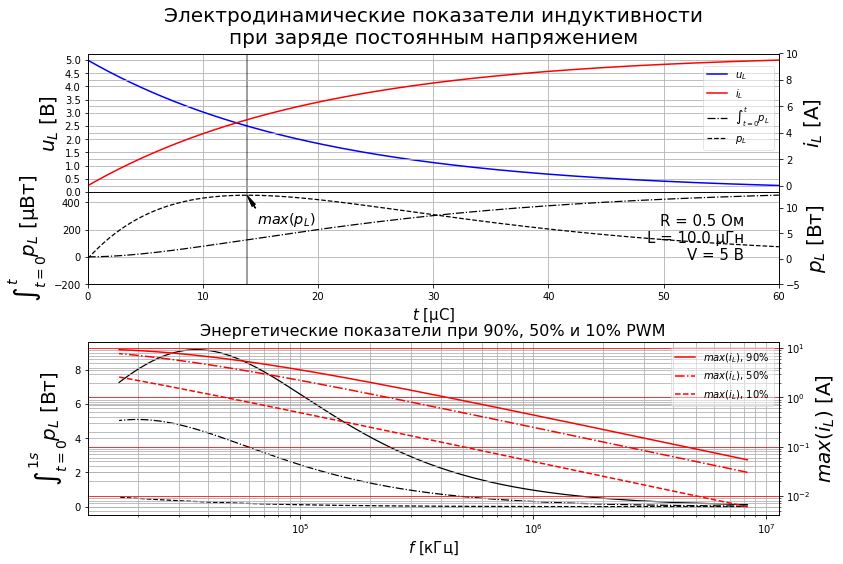

In [2]:
# -*- coding: utf-8 -*-

#print plt.rcParams.keys

hspan, vspan, bottom, axes_height_koefs = .1, .1, .1, [.3, .2, .5]
rect_axes = [hspan, vspan, 1 - 2 * hspan, 1 - 2 * vspan] # left, bottom, width, height
rect1 = [rect_axes[0], rect_axes[1] + rect_axes[3] * sum(axes_height_koefs[1:]), rect_axes[2], rect_axes[3] * axes_height_koefs[0]]
rect2 = [rect_axes[0], rect_axes[1] + rect_axes[3] * sum(axes_height_koefs[2:]), rect_axes[2], rect_axes[3] * axes_height_koefs[1]]
rect3 = [rect_axes[0], rect_axes[1] + rect_axes[3] * sum(axes_height_koefs[3:]), rect_axes[2], rect_axes[3] * axes_height_koefs[2] - vspan]

fig = plt.figure(figsize=(12,8))

# plot Ul
ax1 = fig.add_axes(rect1)
ax1.set_xlim(0, max(tt))
#ax1.set_xticks(np.arange(0.0,max(tt),max(tt)/10))
ax1.plot(tt, ul(tt), 'b', linewidth=1.5, label=r'$u_L$')
ax1.set_xticklabels([])
ax1.set_ylabel(u'{} [В]'.format(r'$u_L$'), fontsize=20, fontname='Arial')
ax1.set_yticks(np.arange(0.0,5.5,.5))

# plot il
ax11 = ax1.twinx()
ax11.set_xlim(0, max(tt))
ax11.plot(tt, il(tt), 'r', linewidth=1.5, label=r'$i_L$')
ax11.set_ylabel(u'{} [А]'.format(r'$i_L$'), fontsize=20, fontname='Arial')

# plot integral of Pl dt
ax3 = fig.add_axes(rect2)
#ax3.set_xticks(np.arange(0.0,max(tt),max(tt)/10))
ax3.set_xlim(0, max(tt))
ax3.set_xlabel(r'$t$' + u' [\xB5С]', fontname='Arial', fontsize=15)
ax3.set_ylabel(u'{} [\xB5Вт]'.format(r'$\int_{t=0}^{t}p_L$'), fontsize=20, fontname='Arial')
ax3.plot(tt, [Pl_integrate(x) * 1e6 for x in tt], 'k-.', linewidth=1.25, label=r'$\int_{t=0}^{t}p_L$')
ax3.set_xticklabels(tuple('{:.0f}'.format(x*1e6) for x in ax3.get_xticks()))
ax3.set_yticks(ax3.get_yticks()[:-1])
ax31 = ax3.twinx()
ax31.set_xlim(0, max(tt))
ax31.plot(tt, Pl(tt), 'k--', linewidth=1.25, label=r'$p_L$')
ax31.set_yticks(ax31.get_yticks()[:-1])
ax31.set_ylabel(u'{} [Вт]'.format(r'$p_L$'), fontsize=20, fontname='Arial')
ax3.grid(True)

# plot labels
ax1.set_title(u'Электродинамические показатели индуктивности\nпри заряде постоянным напряжением', fontname='Arial', fontsize=20, verticalalignment='bottom')
ax1.grid(True)
ax11.grid(True)

# place legend for twin x axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines31, labels31 = ax31.get_legend_handles_labels()
ax11.legend(lines + lines2 + lines3 + lines31, labels + labels2 + labels3 + labels31, fancybox=True, framealpha=.5, loc = 'upper right', bbox_to_anchor = (1, .95))

# place schematic parameters
plt.text(.95, .5, u'R = {} Ом\nL = {:.1f} \xB5Гн\nV = {:.0f} В'.format(R, L * 1e6, Vin), fontname='Arial', fontsize=15, horizontalalignment='right', verticalalignment='center', transform=ax3.transAxes)
pl_max_t = [x for x in tt if max(Pl(tt)) == Pl(x)][0]
ax1.axvline(pl_max_t, color='black', alpha=.5)
ax3.axvline(pl_max_t, color='black', alpha=.5)
ax31.annotate(r'$max(p_L)$', xy=(pl_max_t, Pl(pl_max_t)), xycoords='data', xytext=(10, -15), textcoords='offset points',
                arrowprops=dict(facecolor='black', shrink=0.01, width=.5, headwidth=4, frac=.5),
                horizontalalignment='left', verticalalignment='top',fontsize='x-large')

# place energy plot

#ff = np.linspace(1e4,np.ceil(.001/(1.1*(max(tt))))*1000,500)
ff = [round(1/x) for x in tt[1:]]
ff_pl_max = np.linspace(1e4,np.ceil(.001/(1.1*(pl_max_t*.9)))*1000,500)

# plot max pl
ax4 = fig.add_axes(rect3)
ax4.set_xlabel(r'$f$' + u' [кГц]', fontname='Arial', fontsize=15)
ax4.set_ylabel(u'{} [Вт]'.format(r'$\int_{t=0}^{1s}p_L$'), fontsize=20, fontname='Arial')
ax4.set_xscale('log')
ax4.plot(ff, [Pl_integrate((1/x)*.9) * x for x in ff], 'k', linewidth=1.25, label='{}, 90%'.format(r'$\int_{t=0}p_L$'))
ax4.plot(ff, [Pl_integrate((1/x)*.5) * x for x in ff], 'k-.', linewidth=1.25, label='{}, 50%'.format(r'$\int_{t=0}p_L$'))
ax4.plot(ff, [Pl_integrate((1/x)*.1) * x for x in ff], 'k--', linewidth=1.25, label='{}, 10%'.format(r'$\int_{t=0}p_L$'))
#ax4.set_xticks([1/x for x in ax3.get_xticks() if x != 0], minor=True)
#ax4.set_xticklabels(tuple('{:.0f}'.format(x*.001) for x in ax4.get_xticks()))

# plot max il
ax41 = ax4.twinx()
ax41.plot(ff, [il((1/x)*.9) for x in ff], 'r', linewidth=1.5, label='{}, 90%'.format(r'$max(i_L)$'))
ax41.plot(ff, [il((1/x)*.5) for x in ff], 'r-.', linewidth=1.5, label='{}, 50%'.format(r'$max(i_L)$'))
ax41.plot(ff, [il((1/x)*.1) for x in ff], 'r--', linewidth=1.5, label='{}, 10%'.format(r'$max(i_L)$'))
ax41.set_ylabel(u'{} [А]'.format(r'$max(i_L)$'), fontsize=20, fontname='Arial')
ax41.set_yscale('log')
ax41.yaxis.grid(True, which=u'both')
for gl in ax41.get_ygridlines():
    gl.set_color('r')
    #gl.set_linestyle('-.')

ax4.grid(True)
ax4.xaxis.grid(True, which=u'both')
ax41.grid(True)
ax41.legend(fancybox=True,framealpha=.5)
ax4.set_title(u'Энергетические показатели при 90%, 50% и 10% PWM', fontname='Arial', fontsize=16)

plt.show()

#plt.savefig(u'C:\\Work\\Plot R={:.1f} L={:.0f}мкГн Vin={:.0f}В.png'.format(R, L*1e6, Vin))
#plt.savefig(u'C:\\Users\\Player\\Documents\\Plot R={:.1f} L={:.0f}мкГн Vin={:.0f}В.png'.format(R, L*1e6, Vin))

In [ ]:
#pwm_ff = np.arange(200000.0, 500000.0, 50000.0) # Гц
pwm_ff = np.arange(50000.0, 100000.0, 10000.0) # Гц
pwm_kk = np.linspace(.01,.9,500)

fig = plt.figure(figsize=(12,8))
axes = plt.subplot(111)

# plot max pl; max il; max il
axes2 = axes.twinx()
for line_color, pwm_f in zip(mpl.rcParams['axes.color_cycle'], pwm_ff):
    axes.plot(pwm_kk, [Pl_integrate((1/pwm_f)*x) * pwm_f for x in pwm_kk], color=line_color, linewidth=1.25, label=u'{:.0f}'.format(pwm_f/1000))
    axes2.plot(pwm_kk, [il((1/pwm_f)*x) for x in pwm_kk], '--', color=line_color, linewidth=1.5, label=r'$max(i_L)$')
    axes2.plot(pwm_kk, [integrate.quad(lambda xx: il(xx), 0, (1/pwm_f)*x)[0] * pwm_f for x in pwm_kk], '-.', color=line_color, linewidth=1.5, label=r'$\int_{t=0}^{1s}{i_L}$')

axes.set_xlabel(r'$K_{PWM}$' + u' [%]', fontname='Arial', fontsize=15)
axes.set_ylabel(u'{} [Вт]'.format(u'$\int_{t=0}^{1s}p_L$'), fontsize=20, fontname='Arial')
axes2.set_ylabel(u'{} [А];  {} [А]'.format(r'$max(i_L)$', r'$\int_{t=0}^{1s}{i_L}$'), fontsize=20, fontname='Arial')
axes.set_xticklabels(tuple('{:.0f}'.format(x*100) for x in axes.get_xticks()))
#axes.set_yscale('log')
axes.grid(True)
lines, labels = axes.get_legend_handles_labels()
lines2, labels2 = axes2.get_legend_handles_labels()
axes.legend([lines[0]] + [lines2[0]] + [lines2[1]], [r'$\int_{t=0}^{1s}{p_L}$'] + [labels2[0]] + [labels2[1]], loc='upper left',framealpha=.5,fancybox=True,ncol=3)
axes2.legend(lines, labels, loc='center left',framealpha=.5,fancybox=True)
axes2.get_legend().set_title(u'{} [кГц]'.format(r'$f_{PWM}$'),prop=dict(family='Arial'))
axes.text(.03, .75, u'R = {} Ом\nL = {:.1f} \xB5Гн\nV = {:.0f} В'.format(R, L * 1e6, Vin), fontname='Arial', fontsize=15, horizontalalignment='left', verticalalignment='center', transform=axes.transAxes, zorder=100)
axes.set_title(u'Эксплуатационные параметры индуктивности в режиме PWM', fontname='Arial', fontsize=16)

plt.show()

#plt.savefig(u'C:\\Work\\Plot PWM R={:.1f} L={:.0f}мкГн Vin={:.0f}В.png'.format(R, L*1e6, Vin))
#plt.savefig(u'C:\\Users\\Player\\Documents\\Plot PWM R={:.1f} L={:.0f}мкГн Vin={:.0f}В.png'.format(R, L*1e6, Vin))

In [ ]:
print help(plt.subplot)